In [3]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from dmpling.dmp import DMP

## Load data of path points on a 2D plane

In [4]:
data = np.load('../assets/number2.npy')

path1 = data[:, 0]
path2 = data[:, 1]
n = path1.shape[0]

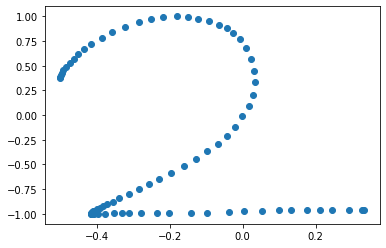

In [5]:
plt.figure()
plt.scatter(path1, path2)
plt.show()

## Since data is 2D, we need 2 DMPs

In [21]:
# define dmps
dt = 1e-2
T = n * dt
a = 10
b = a / 4
n_bfs = 100

dmp1 = DMP(T, dt, n_bfs=n_bfs, a=a, b=b)
dmp1.fit(path1)

dmp2 = DMP(T, dt, n_bfs=n_bfs, a=a, b=b)
dmp2.fit(path2)

In [22]:
# run
y1 = np.zeros(dmp1.cs.N)
y2 = np.zeros(dmp1.cs.N)

k = 1.3
for i in range(dmp1.cs.N):
    y1[i], _, _, _ = dmp1.step(k=k)
    y2[i], _, _, _ = dmp2.step(k=k)


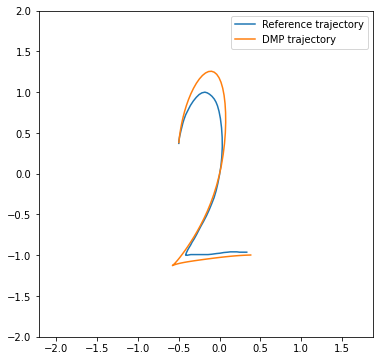

In [23]:
# plot
plt.figure(figsize=(6, 6))

plt.plot(path1, path2, label="Reference trajectory")
plt.plot(y1, y2, label="DMP trajectory")

plt.axis('equal')
plt.xlim([path1.min()*2, path1.max()*2])
plt.ylim([path2.min()*2, path2.max()*2])
plt.legend()
plt.show()